<a href="https://colab.research.google.com/github/loyceNankoma/AI-ML-Bioinformatics-Training/blob/master/Housing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Importing required libraries
import pandas as pd # For the manipulation of tabular data
import numpy as np # For improved numerical calculation
import matplotlib.pyplot as plt # For plotting
import ydata_profiling as pf
import seaborn as sns # For improved plot outlook
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import webbrowser
import os
%matplotlib inline

# Importing the scaler
from sklearn.preprocessing import StandardScaler

# Importing required models and metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

# removing the warnings from the cells.
import warnings
warnings.filterwarnings('ignore')

In [6]:
!pip install ydata-profiling


In [7]:
Data = pd.read_csv("/content/sample_data/california_housing_test.csv")

##Reading Data

In [8]:
# Load dataset
Data = pd.read_csv("/content/sample_data/california_housing_test.csv")
# Print the first 10 rows of the dataframe.
Data.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   
5    -119.56     36.51                37.0       1018.0           213.0   
6    -121.43     38.63                43.0       1009.0           225.0   
7    -120.65     35.48                19.0       2310.0           471.0   
8    -122.84     38.40                15.0       3080.0           617.0   
9    -118.02     34.08                31.0       2402.0           632.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  
5       663.0       204.0         1.6635             67000.0  
6       604.0       218.0         1.6641             67000.0  
7      1341.0       441.0         3.2250            166900.0  
8      1446.0       599.0         3.6696            194400.0  
9      2830.0       603.0         2.3333            164200.0

In [9]:
# Load dataset
Data2 = pd.read_csv("/content/sample_data/california_housing_train.csv")
# Print the first 10 rows of the dataframe.
Data2.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   
5    -114.58     33.63                29.0       1387.0           236.0   
6    -114.58     33.61                25.0       2907.0           680.0   
7    -114.59     34.83                41.0        812.0           168.0   
8    -114.59     33.61                34.0       4789.0          1175.0   
9    -114.60     34.83                46.0       1497.0           309.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0  
5       671.0       239.0         3.3438             74000.0  
6      1841.0       633.0         2.6768             82400.0  
7       375.0       158.0         1.7083             48500.0  
8      3134.0      1056.0         2.1782             58400.0  
9       787.0       271.0         2.1908             48100.0

In [10]:
# Load dataset
Data = pd.read_csv("/content/sample_data/california_housing_test.csv")
# Print the first 10 rows of the dataframe.
Data.head(10)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.05     37.37                27.0       3885.0           661.0   
1    -118.30     34.26                43.0       1510.0           310.0   
2    -117.81     33.78                27.0       3589.0           507.0   
3    -118.36     33.82                28.0         67.0            15.0   
4    -119.67     36.33                19.0       1241.0           244.0   
5    -119.56     36.51                37.0       1018.0           213.0   
6    -121.43     38.63                43.0       1009.0           225.0   
7    -120.65     35.48                19.0       2310.0           471.0   
8    -122.84     38.40                15.0       3080.0           617.0   
9    -118.02     34.08                31.0       2402.0           632.0   

   population  households  median_income  median_house_value  
0      1537.0       606.0         6.6085            344700.0  
1       809.0       277.0         3.5990            176500.0  
2      1484.0       495.0         5.7934            270500.0  
3        49.0        11.0         6.1359            330000.0  
4       850.0       237.0         2.9375             81700.0  
5       663.0       204.0         1.6635             67000.0  
6       604.0       218.0         1.6641             67000.0  
7      1341.0       441.0         3.2250            166900.0  
8      1446.0       599.0         3.6696            194400.0  
9      2830.0       603.0         2.3333            164200.0

##Exploratory Data Analysis.

This will generate a report that gives basic information about the data types, columns, null value counts, memory usage, etc. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


*   This helps us to clean our data by identifying missing values, handling outliers and tranforming data types.
*   It gives a summary statistics such as mean, median, mode, and standard deviation to help understand the distribution of the data.
*   Through graphs, charts, etc, we are able to visualize the data and identify different patterns, trends, and outliers.
*   EDA helps us to identify the strength of relationships between variables using correlation and regression analysisThis will generate a report that gives basic information about the data types, columns, null value counts, memory usage, etc. EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

*  This helps us to clean our data by identifying missing values, handling outliers and tranforming data types.
*   Through graphs, charts, etc, we are able to visualize the data and identify different patterns, trends, and outliers.

*  EDA helps us to identify the strength of relationships between variables using correlation and regression analysis Here, the dataset will be explored to identify its features, any possible errors or duplications during data entry.
*  It gives a summary statistics such as mean, median, mode, and standard deviation to help understand the distribution of the data.
It involves checking out the number of columns, rows, null values, descriptive statistics (data distributions).

I have considered the following order:

**Data description**

**Univariate analysis** - Here, I explore each individual feature/ column to gain more insight into its distribution.

**Bivariate analysis** - Here, I explore the relatedness between each two individual features, more like checking their correlation. I mainly considered the relatedness of each feature to the target.

**Multivariate analysis** - Here, I explore the relatedness of three or more features of which one is the target . This is based on insights obtained from Bivariate analysis.










In [11]:
# Analyse statically insight of data
Data.describe()

longitude    latitude  housing_median_age   total_rooms  \
count  3000.000000  3000.00000         3000.000000   3000.000000   
mean   -119.589200    35.63539           28.845333   2599.578667   
std       1.994936     2.12967           12.555396   2155.593332   
min    -124.180000    32.56000            1.000000      6.000000   
25%    -121.810000    33.93000           18.000000   1401.000000   
50%    -118.485000    34.27000           29.000000   2106.000000   
75%    -118.020000    37.69000           37.000000   3129.000000   
max    -114.490000    41.92000           52.000000  30450.000000   

       total_bedrooms    population  households  median_income  \
count     3000.000000   3000.000000  3000.00000    3000.000000   
mean       529.950667   1402.798667   489.91200       3.807272   
std        415.654368   1030.543012   365.42271       1.854512   
min          2.000000      5.000000     2.00000       0.499900   
25%        291.000000    780.000000   273.00000       2.544000   
50%        437.000000   1155.000000   409.50000       3.487150   
75%        636.000000   1742.750000   597.25000       4.656475   
max       5419.000000  11935.000000  4930.00000      15.000100   

       median_house_value  
count          3000.00000  
mean         205846.27500  
std          113119.68747  
min           22500.00000  
25%          121200.00000  
50%          177650.00000  
75%          263975.00000  
max          500001.00000

In [12]:
# Checking the shape of the data
Data.shape

(3000, 9)

The above shows 3000 entries and 9 coloumns

In [13]:
#lists the data types within our data set
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


In [14]:
# Displaying the data's descriptive statistics
Data.describe().T

count           mean            std         min  \
longitude           3000.0    -119.589200       1.994936   -124.1800   
latitude            3000.0      35.635390       2.129670     32.5600   
housing_median_age  3000.0      28.845333      12.555396      1.0000   
total_rooms         3000.0    2599.578667    2155.593332      6.0000   
total_bedrooms      3000.0     529.950667     415.654368      2.0000   
population          3000.0    1402.798667    1030.543012      5.0000   
households          3000.0     489.912000     365.422710      2.0000   
median_income       3000.0       3.807272       1.854512      0.4999   
median_house_value  3000.0  205846.275000  113119.687470  22500.0000   

                           25%           50%            75%          max  
longitude             -121.810    -118.48500    -118.020000    -114.4900  
latitude                33.930      34.27000      37.690000      41.9200  
housing_median_age      18.000      29.00000      37.000000      52.0000  
total_rooms           1401.000    2106.00000    3129.000000   30450.0000  
total_bedrooms         291.000     437.00000     636.000000    5419.0000  
population             780.000    1155.00000    1742.750000   11935.0000  
households             273.000     409.50000     597.250000    4930.0000  
median_income            2.544       3.48715       4.656475      15.0001  
median_house_value  121200.000  177650.00000  263975.000000  500001.0000

##Checking for Null values in our Dataset

In [15]:
def missing (Data):
    missing_number = Data.isnull().sum().sort_values(ascending=False)
    missing_percent = (Data.isnull().sum()/Data.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(Data)

Missing_Number  Missing_Percent
longitude                        0              0.0
latitude                         0              0.0
housing_median_age               0              0.0
total_rooms                      0              0.0
total_bedrooms                   0              0.0
population                       0              0.0
households                       0              0.0
median_income                    0              0.0
median_house_value               0              0.0

The above results shows no missing values

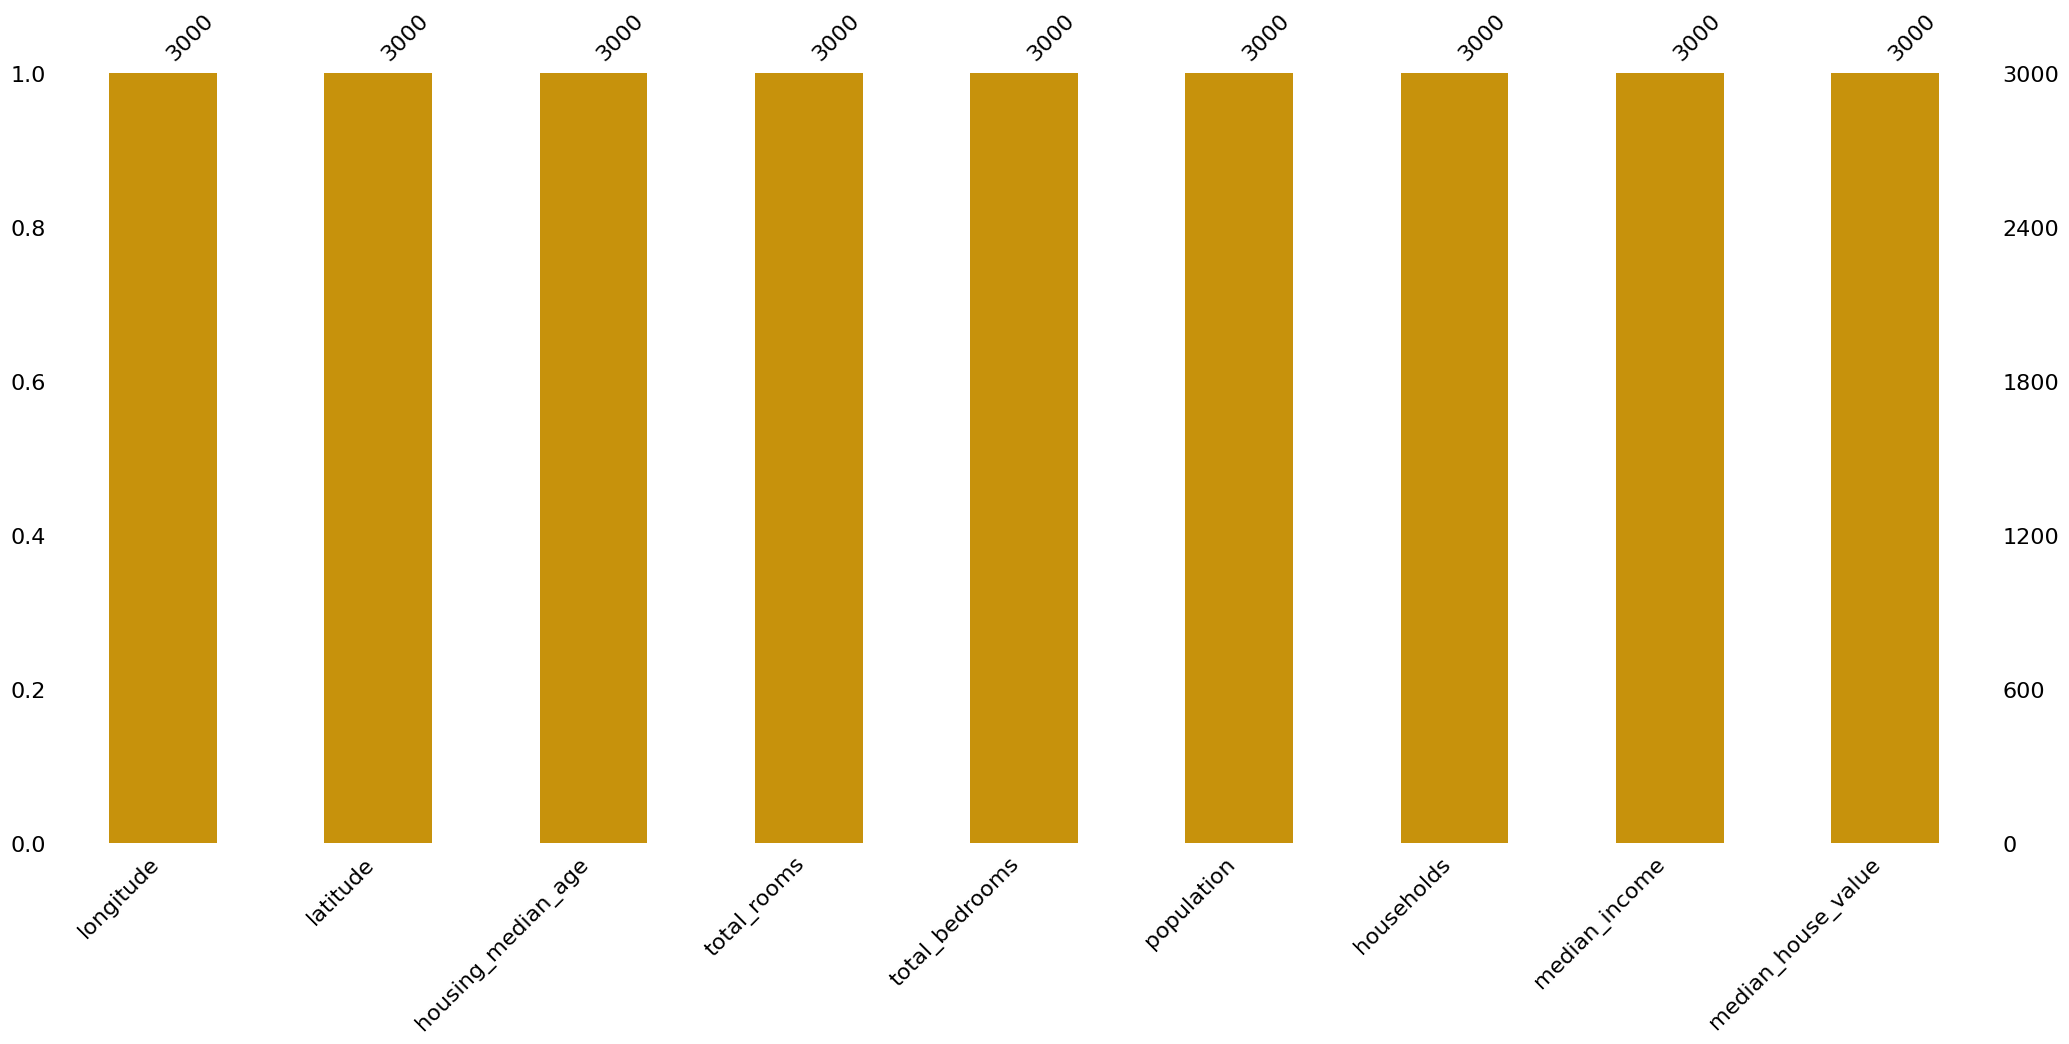

In [16]:
#visualizing for missing values
null_plot = msno.bar(Data, color = "#c7920c")

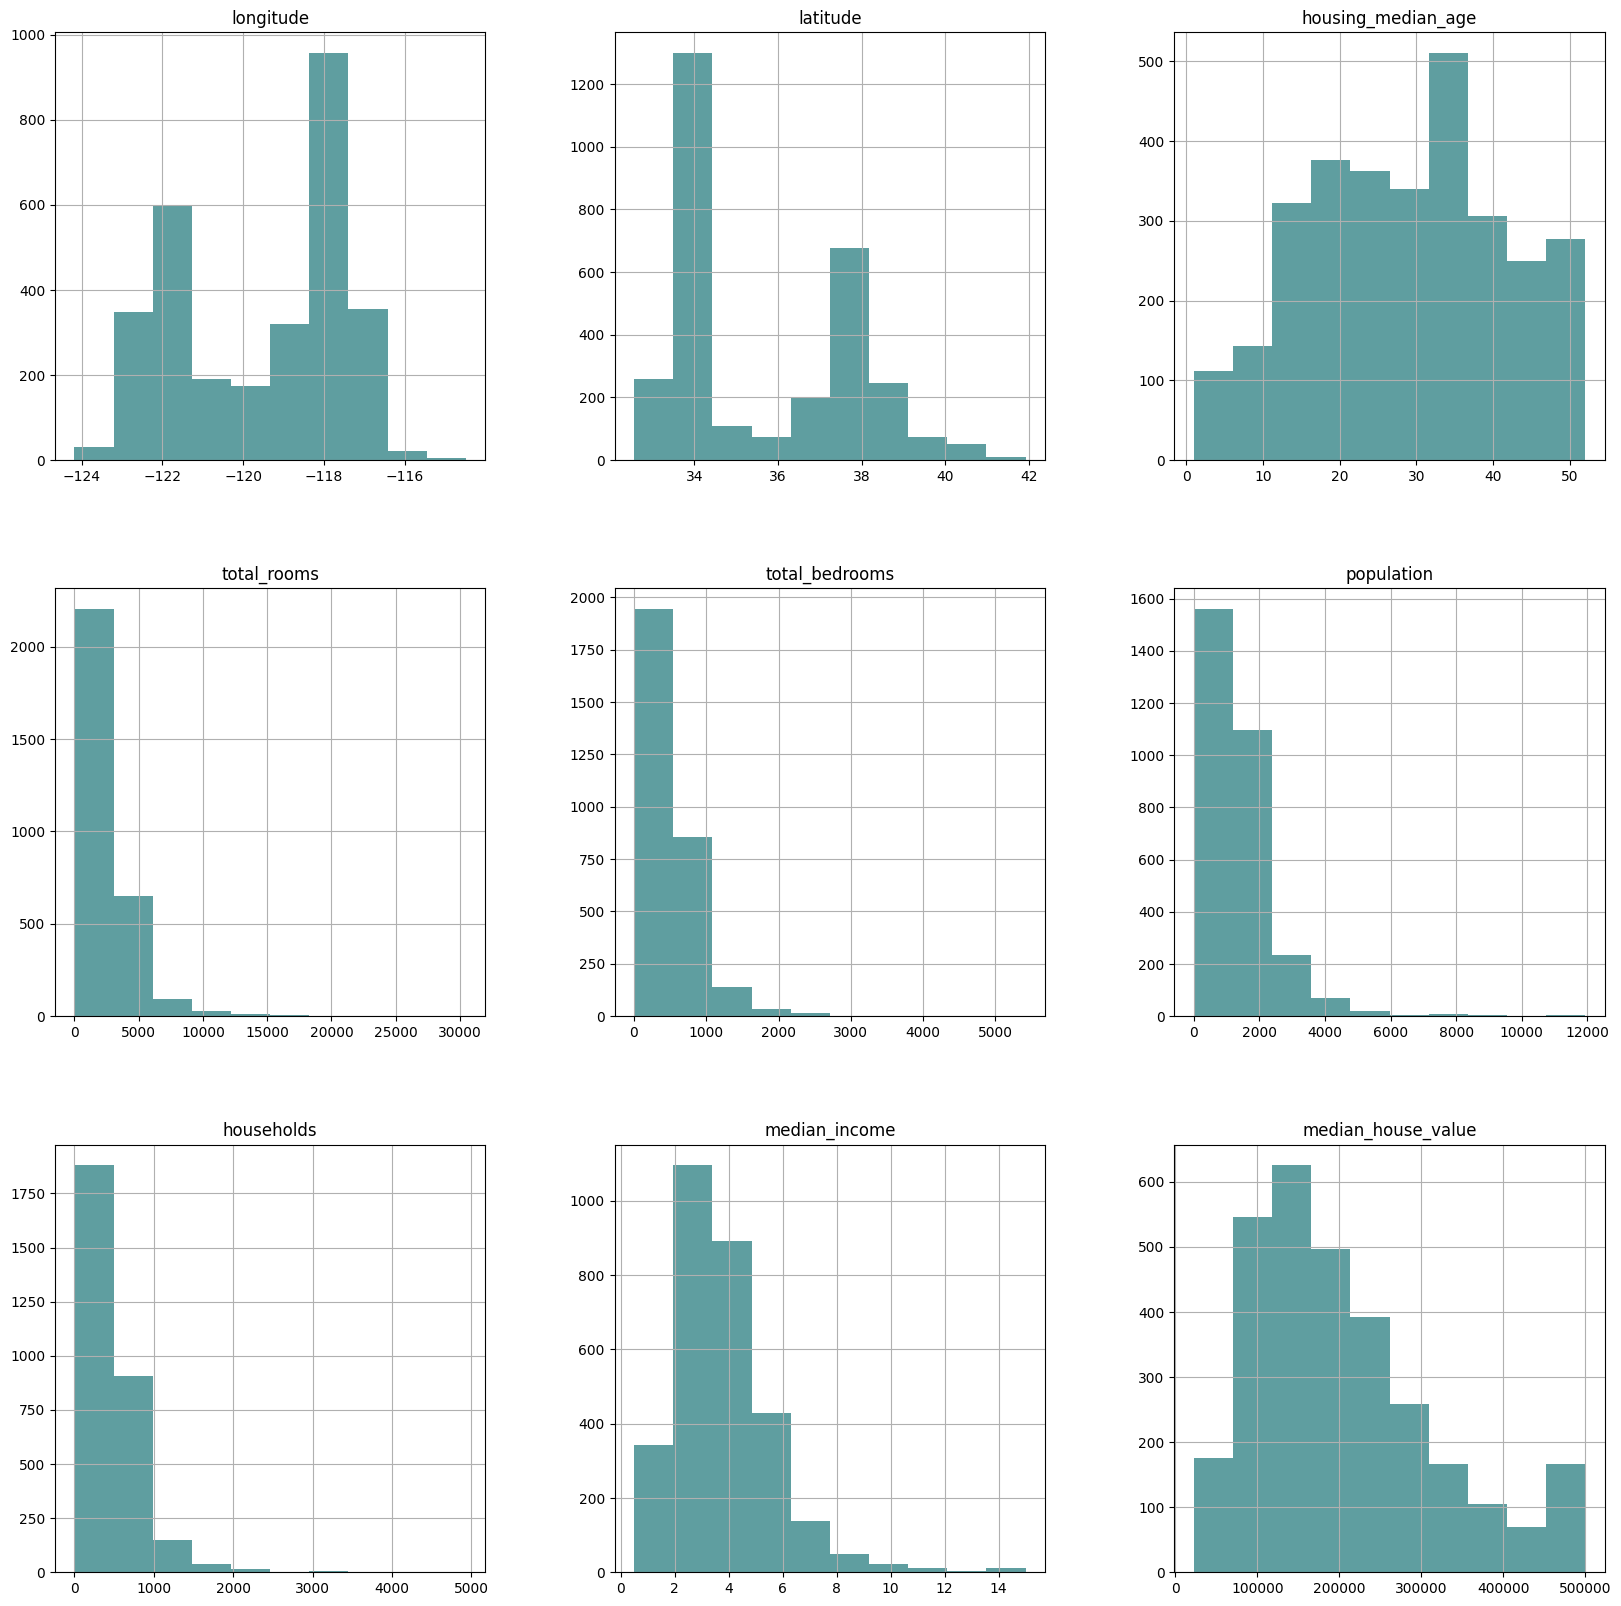

In [17]:
data_hist_plot = Data.hist(figsize = (20,20), color = "#5F9EA0")

## Checking for Duplicates

In [18]:
#checking for duplicates
Data.duplicated().sum()

0

In [20]:
import ydata_profiling
from ydata_profiling import ProfileReport

# Example: if you have a pandas DataFrame df
profile = ProfileReport(Data2)
profile.to_notebook_iframe()  # This will display the report in a notebook


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]